In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
columns = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

columns += [f"Wilderness_Area{i}" for i in range(1, 5)]

columns += [f"Soil_Type{i}" for i in range(1, 41)]

columns += ["Cover_Type"]

df = pd.read_csv(r"D:\Elevoo Tasks\Task #3\forest_dataset.csv", names=columns)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           10001 non-null  int64
 1   Aspect                              10001 non-null  int64
 2   Slope                               10001 non-null  int64
 3   Horizontal_Distance_To_Hydrology    10001 non-null  int64
 4   Vertical_Distance_To_Hydrology      10001 non-null  int64
 5   Horizontal_Distance_To_Roadways     10001 non-null  int64
 6   Hillshade_9am                       10001 non-null  int64
 7   Hillshade_Noon                      10001 non-null  int64
 8   Hillshade_3pm                       10001 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  10001 non-null  int64
 10  Wilderness_Area1                    10001 non-null  int64
 11  Wilderness_Area2                    10001 non-null  int64
 12  Wild

In [100]:
from sklearn.model_selection import train_test_split
X = df.drop('Cover_Type' , axis=1)
y = df['Cover_Type']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = cross_val_score(DecisionTreeClassifier() , X, y, cv=5)
dt.mean()*100

d:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


np.float64(71.25295852073964)

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf = cross_val_score(RandomForestClassifier(n_estimators=100 , random_state=42) , X, y, cv=5)
rf.mean()*100

d:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


np.float64(80.16195902048976)

In [103]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_test,y_pred)*100

79.91004497751123

<Axes: >

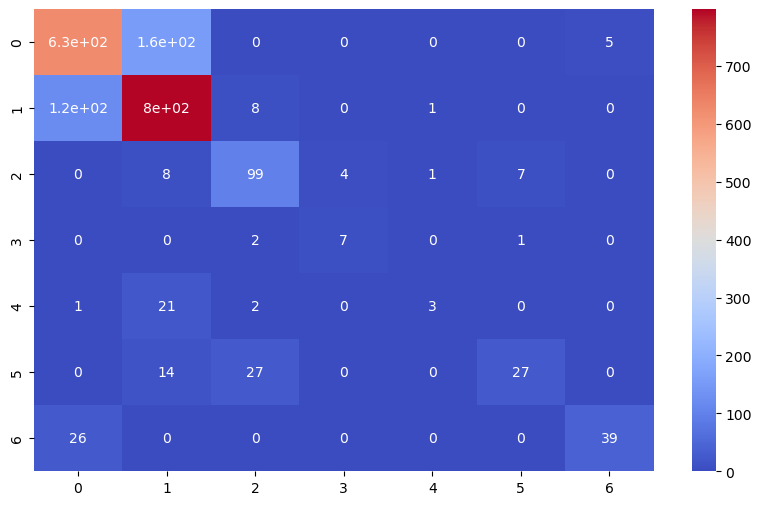

In [105]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , cmap='coolwarm')